# Project: Wrangling and Analyze Data: Twitter Analysis on WeRateDogs

## Data Gathering



In [1]:
# Importing python libraries and packages
import pandas as pd
import requests
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import os

### Programmatic Assessment

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Load the "twitter-archive-enhanced.csv" file into a dataframe called "df_twitter_archive"
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download the tweet image-prediction ("image-predictions.tsv") using the REQUEST library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Save the "image-predictions.tsv" to a file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
# Load the "image-predictions.tsv" file in a dataframe called "df_image_predict"
df_image_predict = pd.read_csv('image-predictions.tsv',sep="\t")    

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# NOTE TO REVIEWER: I have mobile verification issues so the following
#Twitter API code was sent to me from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [6]:
# Make an empty list to store data extracted from the json file
reweet_and_favorite_count = []

# Open the json file and iterate through all lines

with open('tweet-json.txt', mode='r') as file:
    for line in file:
        line_data = json.loads(line)
        
        #Extract the tabs from the json file
        tweet_id = line_data['id']
        retweet_count =  line_data['retweet_count']
        favorite_count = line_data['favorite_count']
        full_text = line_data['full_text']
        
        #Extract the name of the dog from the sentence
        dog_name_sentence = re.search('([Tt]his is\s\w+)', full_text) or re.search('([Mm]eet\s\w+)', full_text)
        dog_name = ""
        
        # Let's check that the search returned a name
        if(dog_name_sentence):
            dog_name = dog_name_sentence.group().split()[-1]
            
        # Let's add the extracted data to the empty list
        reweet_and_favorite_count.append({'tweet_id': tweet_id, 'retweet_count': retweet_count,
                          'favorite_count': favorite_count, 'name': dog_name})

In [7]:
retweet_count_and_favorite_count = pd.DataFrame(reweet_and_favorite_count, 
                                                columns=['tweet_id','name', 'retweet_count', 'favorite_count'])

In [8]:
# Check the length of the retweet_count_and_favorite_count
len(retweet_count_and_favorite_count)

2354

## Assessing Data
- In this section, we will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
- We will also use **both** visual assessment and programmatic assessement to assess the data.


- Now, the three datasets (**df_twitter_archive, df_image_predict and retweet_count_and_favorite_count**) will need to be assessed to gather more information about each dataframe such as : the number of columns, rows, the statistics of each data in each dataframe, shapes, data types and others.
- Check for missing values, duplicated data, redundant columns, unique values or characters etc

In [9]:
# Display the information in each dataset(retweet_count_and_favorite_count, df_image_predict and df_twitter_archive)
# First, start with the twitter_archive dataset
df_twitter_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# View the column head of the twitter_archive dataset
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Check for the total number of rows and columns in the twitter_archive dataset
df_twitter_archive.shape

(2356, 17)

In [12]:
# Check the statistics of the data in the twitter_archive dataset
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Check for missing data in the twitter_archive dataset
df_twitter_archive.isnull().sum().any()

True

In [14]:
# Check for sum of missing data for rows in the twitter_archive dataset
sum(df_twitter_archive.isnull().values.any(axis=1))

2356

#### Comment
>- Check through each of the column in the twitter_archive dataset to check for missing values and duplicated data.
>- Only display and work through those with missing values and duplicated values 

In [15]:
# Check for the sum of duplicated values in "source" column in the twitter_archive dataset
sum(df_twitter_archive.source.duplicated())

2352

In [16]:
# Use the unique function to view the content in the "source" column present in the twitter_archive dataset
df_twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [17]:
# Use the value-counts function to view some of the content in the "name" column present in the twitter_archive dataset
df_twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Sparky       1
Norman       1
Billl        1
Kawhi        1
Maude        1
Name: name, Length: 957, dtype: int64

In [18]:
# Check for the sum of the missing values in the "expanded_urls" column in the twitter_archive dataset
sum(df_twitter_archive['expanded_urls'].isnull())

59

In [19]:
# Check for duplicated url in expanded_url's column of the twitter_archive dataset
df_twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/810254108431155201/photo/1                                                                                                                                                                                                                                                     2
https://twitter.com/dog_rates/status/698195409219559425/photo/1                                                                                                                                                                                                                                                     2
https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1                                                                                                                     2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https:

In [20]:
# Check for the sum of duplicated values in the "expanded_urls" column in the twitter_archive dataset
df_twitter_archive['expanded_urls'].duplicated().sum()

137

In [21]:
# Check for the sum of the missing values in the "retweeted_status_id" column in the twitter_archive dataset
sum(df_twitter_archive['retweeted_status_id'].isnull())

2175

In [22]:
#Randomly take an overview of the twitter_archive dataset
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,None,None,None,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


#### Comment
>- Assess each of the column in the **`image_predict`** dataset to gather information about the dataset and to also check for missing values and duplicated data. Thereafter, display and work through those having issues.

In [23]:
# Gather information about the image_predict dataset
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Have an overview of what the image_predict dataset is about
df_image_predict.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
254,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,dhole,0.350416,False,hare,0.236661,False,wood_rabbit,0.091133,False
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
675,683449695444799489,https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg,1,Lakeland_terrier,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True


In [25]:
# Analyse the statistical data from the dataset
df_image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
# Check for missing data in columns
df_image_predict.isnull().sum().any()

False

In [27]:
# Check the arrays in the "image number" column 
df_image_predict["img_num"].unique()

array([1, 4, 2, 3], dtype=int64)

In [28]:
# Check the sum of the duplicates in the "jpg_url" column of the image_predict dataset
sum(df_image_predict.jpg_url.duplicated())

66

In [29]:
# View the duplicated data in the "jpg_url" column of the image_predict dataset
df_image_predict.jpg_url.value_counts()

https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg    2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg    2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg    2
                                                  ..
https://pbs.twimg.com/media/CmZqIslWIAQFiqe.jpg    1
https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg    1
https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg    1
https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg    1
https://pbs.twimg.com/media/CVROAIfWsAECA5t.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [30]:
# Check for the content in the "p1_dog" column of the image_predict table
df_image_predict.p1_dog.unique()

array([ True, False])

#### Comment
- Since **p1_dog, p2_dog and p3_dog** show that **TRUE** value predicts that the breed is a dog and FALSE value predict otherwise, it is necessary to assess the rows which shows **FALSE** for all these columns.

In [31]:
# Check for the rows where p1_dog IS a breed of dog 
df_image_predict[df_image_predict["p1_dog"]]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [32]:
# Check for the rows where p1_dog is NOT a breed of dog
df_image_predict[~df_image_predict["p1_dog"]]


# Source: https://stackoverflow.com/questions/45880474/display-rows-where-a-column-is-false-in-pandas

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [33]:
# Get the value_counts for the rows where p2_dog is NOT a breed of dog
p2_not_dog = df_image_predict.loc[df_image_predict['p2_dog']== False]
p2_not_dog.p2_dog.value_counts()

False    522
Name: p2_dog, dtype: int64

In [34]:
# Get the value_counts for the rows where p3_dog is NOT a breed of dog
p3_not_dog = df_image_predict.loc[df_image_predict['p3_dog']== False]
p3_not_dog.p3_dog.value_counts()

False    576
Name: p3_dog, dtype: int64

#### Comment
>- Assess each of the column in the **`retweet_count_and_favorite_count`** dataset to gather information about the dataset and to also check for missing values and duplicated data. Thereafter, display and work through those having issues.

In [35]:
# Gather information about the retweet_count_and_favorite_count
retweet_count_and_favorite_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   name            2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [36]:
#Sort values by decending order to know the highest favorite count
retweet_count_and_favorite_count.favorite_count.sort_values(ascending=False)

412     132810
1037    131075
65      107956
533     107015
134     106827
         ...  
883          0
478          0
475          0
474          0
866          0
Name: favorite_count, Length: 2354, dtype: int64

In [37]:
#Sort values by decending order to know the highest retweet count
retweet_count_and_favorite_count.retweet_count.sort_values(ascending=False)

1037    79515
259     56625
533     56625
816     52360
1077    52360
        ...  
341         3
112         3
273         3
1293        2
290         0
Name: retweet_count, Length: 2354, dtype: int64

In [38]:
# Have a glance at the retweet_count_and_favorite_count table and also know the number of rows and columns present
retweet_count_and_favorite_count.head()

,tweet_id,name,retweet_count,favorite_count
0,892420643555336193,Phineas,8853,39467
1,892177421306343426,Tilly,6514,33819
2,891815181378084864,Archie,4328,25461
3,891689557279858688,Darla,8964,42908
4,891327558926688256,Franklin,9774,41048


In [39]:
# Get the statistical information of the data in the retweet_count_and_favorite_count table
retweet_count_and_favorite_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [40]:
# Check for duplicated data in the columns
sum(retweet_count_and_favorite_count.duplicated())

0

### Quality issues

##### `twitter_archive` dataframe
1.Drop redundant columns: columns with more null values are considered redundant and thus regarded as low-level information columns.

2.Incorrect data type for "timestamp" and "tweet_id".

3.Incorrect "rating_denominator" such as the denominator not being equal to 10.

4.Duplicated data in the "expanded_url's column". Also, the urls are duplicated in **most cells** of the "expanded_url's column"

5.Unpresentable data in the source column as almost all the data are duplicated. 

6.Rename the "name" column as "dog_name" for better representation/information purpose.

7.Incorrect names of dogs such as ["an", "a", "such", "all", "by", "actually", "this", "the", "O", "not", "getting" etc.].

##### `image_predict` dataframe

8.Convert the "tweet_id" from integer to string for consistency purpose.

9.Duplicated data in "jpg_url" column.

10.Wrong prediction of the breed of dogs ["p1_dog", "p2_dog" and "p3_dog"].


### Tidiness issues
1.Condense the split dog stages ["doggo", "flooter", "pupper" and "puppo" respectively] in twitter_archive table to a column called dog_stage.

2.Omitted "retweet count" and "favorite count" columns in the **`twitter_archive`** table.

## Cleaning Data
In this section, **all** issues documented will be addressed and cleaned. 

### Action 1: Create copies of all the dataframes

In [41]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predict_clean = df_image_predict.copy()
retweet_count_and_favorite_count_clean = retweet_count_and_favorite_count.copy()

### Action 2: Address the tidiness issues

### Issue #1: Dog's stages in twitter_archive table are split into "doggo", "flooter", "pupper" and "puppo" respectively

#### Define:
- Condense all the stages of dogs ["doggo", "flooter", "pupper", "puppo"] into a single column called dog_stage.
- To do this, return all the "None" values into empty
- Then concatenate them
- Drop all the various dog_stage columns present before

#### Code

In [42]:
# Replace all 'None' values with empty 
df_twitter_archive_clean = df_twitter_archive_clean.replace(['None'], [''], regex=True)

In [43]:
# concatenate all the dog stages into a new column called "dog_stage"
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo

In [44]:
# Check the items in the dog_stage column
df_twitter_archive_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [45]:
#Clean the dog_stage column
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

In [46]:
#Drop all those dog_stage columns because they are now redundant ["doggo", "floofer", "pupper", "puppo"]
df_twitter_archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

In [47]:
# Replace the empty spaces in the 'dog_stage' column with "Nan"
df_twitter_archive_clean.dog_stage = df_twitter_archive_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True)

# Source: https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

#### Test

In [48]:
assert "dog_stage" in df_twitter_archive_clean.columns

In [49]:
#Check the items in the stage column
df_twitter_archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [50]:
assert all(map(lambda x:x not in df_twitter_archive_clean.columns,["doggo", "floofer", "pupper", "puppo"]))

### Issue #2: Omitted "retweet_count_and_favorite_count" columns in `twitter_archive` table

#### Define:
> Merge the two tables (**`retweet_count_and_favorite_count.clean`** columns with **`twitter_archive.clean`**) together, joining on the tweet_id.

#### Code

In [51]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, retweet_count_and_favorite_count_clean, on=['tweet_id', 'name'], how='inner')

#### Test

In [52]:
df_twitter_archive_clean.head(3) 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461


In [53]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2220 non-null   int64  
 1   in_reply_to_status_id       74 non-null     float64
 2   in_reply_to_user_id         74 non-null     float64
 3   timestamp                   2220 non-null   object 
 4   source                      2220 non-null   object 
 5   text                        2220 non-null   object 
 6   retweeted_status_id         169 non-null    float64
 7   retweeted_status_user_id    169 non-null    float64
 8   retweeted_status_timestamp  169 non-null    object 
 9   expanded_urls               2163 non-null   object 
 10  rating_numerator            2220 non-null   int64  
 11  rating_denominator          2220 non-null   int64  
 12  name                        2220 non-null   object 
 13  dog_stage                   357 n

In [54]:
df_twitter_archive_clean.favorite_count.sort_values(ascending=False)

392    132810
994    131075
64     107956
507    107015
130    106827
        ...  
221         0
464         0
220         0
394         0
284         0
Name: favorite_count, Length: 2220, dtype: int64

In [55]:
df_twitter_archive_clean.retweet_count.sort_values(ascending=False)

994     79515
507     56625
248     56625
781     52360
1030    52360
        ...  
326         3
261         3
110         3
1235        2
277         0
Name: retweet_count, Length: 2220, dtype: int64

### Action 3: Address all the Quality issues in `twitter_archive_clean` dataset

### Issue #3: Drop all redundant columns

#### Define:
- Columns with more null values are considered redundant and thus regarded as low-level information columns
- Check for redundant columns by calculating the percentage of missing values
- Drop the columns with the more than 90% of missing values.

#### Code

In [56]:
(df_twitter_archive_clean.isna().sum())/(len(df_twitter_archive_clean))*100

tweet_id                       0.000000
in_reply_to_status_id         96.666667
in_reply_to_user_id           96.666667
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.387387
retweeted_status_user_id      92.387387
retweeted_status_timestamp    92.387387
expanded_urls                  2.567568
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
dog_stage                     83.918919
retweet_count                  0.000000
favorite_count                 0.000000
dtype: float64

In [57]:
# Drop the redundant columns () in the twitter_archive_clean table
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                               'retweeted_status_id', 'retweeted_status_user_id',
                               'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [58]:
assert 'in_reply_to_status_id' not in list(df_twitter_archive_clean)

In [59]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2220 non-null   int64 
 1   timestamp           2220 non-null   object
 2   source              2220 non-null   object
 3   text                2220 non-null   object
 4   expanded_urls       2163 non-null   object
 5   rating_numerator    2220 non-null   int64 
 6   rating_denominator  2220 non-null   int64 
 7   name                2220 non-null   object
 8   dog_stage           357 non-null    object
 9   retweet_count       2220 non-null   int64 
 10  favorite_count      2220 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 208.1+ KB


### Issue #4: Incorrect data type 

#### Define: 
- For incorrect **timestamp**, change the datatype to datetime datatype
- Also, change the **tweet_id** data type from integer to string

#### Code

In [60]:
df_twitter_archive_clean.timestamp = df_twitter_archive_clean.timestamp.astype('datetime64')
df_twitter_archive_clean['tweet_id'] = df_twitter_archive_clean['tweet_id'].astype(str) 

#### Test

In [61]:
assert df_twitter_archive_clean['tweet_id'].dtypes =='O'

In [62]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2220 non-null   object        
 1   timestamp           2220 non-null   datetime64[ns]
 2   source              2220 non-null   object        
 3   text                2220 non-null   object        
 4   expanded_urls       2163 non-null   object        
 5   rating_numerator    2220 non-null   int64         
 6   rating_denominator  2220 non-null   int64         
 7   name                2220 non-null   object        
 8   dog_stage           357 non-null    object        
 9   retweet_count       2220 non-null   int64         
 10  favorite_count      2220 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 208.1+ KB


### Issue #5: Incorrect Rating_demoninator not equal to 10

#### Define: 
- Check the unique values of the rating_denominator.
- Find the rows with the denominator not equal to 10 and drop the rows

#### Code

In [63]:
df_twitter_archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7, 150,  20,  50,  90,  80,  40, 130, 110,
        11,  16, 120,   2], dtype=int64)

In [64]:
df_twitter_archive_clean.query("rating_denominator != 10").count()

tweet_id              19
timestamp             19
source                19
text                  19
expanded_urls         15
rating_numerator      19
rating_denominator    19
name                  19
dog_stage              0
retweet_count         19
favorite_count        19
dtype: int64

In [65]:
wrong_denominator = df_twitter_archive_clean.query("rating_denominator != 10").index
df_twitter_archive_clean.drop(index=wrong_denominator, axis=0, inplace=True)

# Source: https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

#### Test

In [66]:
df_twitter_archive_clean.rating_denominator.sort_values()

0       10
1486    10
1485    10
1484    10
1483    10
        ..
738     10
739     10
740     10
734     10
2219    10
Name: rating_denominator, Length: 2201, dtype: int64

In [67]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['rating_denominator']>10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [68]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['rating_denominator']<10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


### Issue #6: Duplicated data in the "expanded_url's column" and the incorrect _url_ format in the _cell_ of most "expanded_url's column"

#### Define: 
- For **"expanded_urls"** column in twitter_archive_clean table, drop the duplicates.
- For **incorrect _url_ format present in the "expanded_url's column"**: Clean **each cell** in the "expanded_url's column" to eradicate the duplicates url present in the cell

#### Code

In [69]:
# View the duplicated "expanded_urls" column

ids = df_twitter_archive_clean["expanded_urls"]
df_twitter_archive_clean[ids.isin(ids[ids.duplicated()])].sort_values("expanded_urls")

#source: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
2205,666104133288665088,2015-11-16 04:02:55,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,,NaN,6871,14765
576,798576900688019456,2016-11-15 17:22:24,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,https://twitter.com/dog_rates/status/666104133...,1,10,,NaN,6871,0
2162,667138269671505920,2015-11-19 00:32:12,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,https://twitter.com/dog_rates/status/667138269...,10,10,,NaN,2387,4851
998,743835915802583040,2016-06-17 16:01:16,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,https://twitter.com/dog_rates/status/667138269...,10,10,,NaN,2387,0
260,840728873075638272,2017-03-12 00:59:17,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,NaN,18285,0
...,...,...,...,...,...,...,...,...,...,...,...
1828,673716320723169284,2015-12-07 04:11:02,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,1,10,,NaN,843,3289
1922,671550332464455680,2015-12-01 04:44:10,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,1,10,,NaN,229,967
2027,669684865554620416,2015-11-26 01:11:28,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,11,10,,NaN,99,551
2067,668967877119254528,2015-11-24 01:42:25,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,12,10,,NaN,25,161


In [70]:
df_twitter_archive_clean["expanded_urls"].value_counts()

https://twitter.com/dog_rates/status/775733305207554048/photo/1                                                                                                                                                                                                                                                     2
https://twitter.com/dog_rates/status/692417313023332352/photo/1                                                                                                                                                                                                                                                     2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                                                                     2
https://twitter.com/dog_rates/status/673295268553605120/photo/1       

In [71]:
# Drop the duplicates in the "expanded_urls" column
df_twitter_archive_clean.drop_duplicates(subset="expanded_urls", keep=False, inplace=True)

In [72]:
# Clean each cell in the "expanded_url's column" to eradicate the duplicates url present in the cell. 
# To do this, write a function that will loop through each cell of the column and drop the duplicated url.

def clean_url_cell(row):
    return 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'
df_twitter_archive_clean["expanded_urls"]= df_twitter_archive_clean.apply(lambda row: clean_url_cell(row), axis=1)

#### Test

In [73]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['expanded_urls']== 'https://twitter.com/dog_rates/status/819227688460238848/photo/1']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [74]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['tweet_id']==666104133288665088]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [75]:
sum(df_twitter_archive_clean.expanded_urls.duplicated())

0

In [76]:
df_twitter_archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/785927819176054784/photo/1    1
https://twitter.com/dog_rates/status/802239329049477120/photo/1    1
https://twitter.com/dog_rates/status/890971913173991426/photo/1    1
https://twitter.com/dog_rates/status/675334060156301312/photo/1    1
https://twitter.com/dog_rates/status/671855973984772097/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/706538006853918722/photo/1    1
https://twitter.com/dog_rates/status/777621514455814149/photo/1    1
https://twitter.com/dog_rates/status/667470559035432960/photo/1    1
https://twitter.com/dog_rates/status/757725642876129280/photo/1    1
https://twitter.com/dog_rates/status/684588130326986752/photo/1    1
Name: expanded_urls, Length: 2008, dtype: int64

### Issue #7: Unpresentable data in the source column as almost all the data are duplicated

#### Define: 
- For **"source"** column in twitter_archive_clean table, 99.8% of the data are duplicated.
- Check the unique values in the source column by using the value_counts
- Use parser to break down the html source data and BeautifulSoup to extract the relevant information from the **`source`** column
- Pass the extracted data into a new column called **`new_source`** in the df_twitter_archive_clean dataframe
- Then, drop the old **`source`** column.

#### Code

In [77]:
# Check the unique values in the source column and their frequency value
df_twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1884
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          85
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [78]:
from bs4 import BeautifulSoup
df_twitter_archive_clean['new_source'] = df_twitter_archive_clean[['source']].applymap(lambda text: 
                                                                                       BeautifulSoup(text, 'html.parser').get_text()) 

# Source: https://datascientyst.com/convert-html-to-text-python-pandas/

In [79]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['source']== '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,new_source
502,808344865868283904,2016-12-12 16:16:49,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,https://twitter.com/dog_rates/status/808344865...,11,10,Seamus,NaN,24069,47281,Vine - Make a Scene
535,802600418706604034,2016-11-26 19:50:26,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,https://twitter.com/dog_rates/status/802600418...,11,10,Bailey,NaN,1714,7938,Vine - Make a Scene
639,789903600034189313,2016-10-22 18:57:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,https://twitter.com/dog_rates/status/789903600...,13,10,Ralphy,pupper,4858,11673,Vine - Make a Scene
665,786286427768250368,2016-10-12 19:24:27,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,https://twitter.com/dog_rates/status/786286427...,12,10,Arnie,NaN,3352,8930,Vine - Make a Scene
679,784183165795655680,2016-10-07 00:06:50,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,https://twitter.com/dog_rates/status/784183165...,12,10,Reginald,puppo,9374,22513,Vine - Make a Scene
...,...,...,...,...,...,...,...,...,...,...,...,...
1693,677335745548390400,2015-12-17 03:53:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,https://twitter.com/dog_rates/status/677335745...,12,10,,NaN,2017,3328,Vine - Make a Scene
1708,676916996760600576,2015-12-16 00:09:23,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,https://twitter.com/dog_rates/status/676916996...,10,10,,pupper,2002,3231,Vine - Make a Scene
1718,676593408224403456,2015-12-15 02:43:33,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,https://twitter.com/dog_rates/status/676593408...,11,10,,pupper,2410,4954,Vine - Make a Scene
1732,676121918416756736,2015-12-13 19:30:01,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,https://twitter.com/dog_rates/status/676121918...,8,10,,NaN,1297,2335,Vine - Make a Scene


In [80]:
#Drop the old "source" column 
# df_twitter_archive.drop(df_twitter_archive.columns[2], axis=1, inplace=True)
df_twitter_archive_clean.drop(['source'], axis =1, inplace=True)

# https://www.stackvidhya.com/drop-column-in-pandas/#:~:text=During%20the%20data%20analysis%20operation,%2C%20inplace%3DTrue)%20statement.
# https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

#### Test

In [81]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2219
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2008 non-null   object        
 1   timestamp           2008 non-null   datetime64[ns]
 2   text                2008 non-null   object        
 3   expanded_urls       2008 non-null   object        
 4   rating_numerator    2008 non-null   int64         
 5   rating_denominator  2008 non-null   int64         
 6   name                2008 non-null   object        
 7   dog_stage           317 non-null    object        
 8   retweet_count       2008 non-null   int64         
 9   favorite_count      2008 non-null   int64         
 10  new_source          2008 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 188.2+ KB


In [82]:
df_twitter_archive_clean.new_source.value_counts()

Twitter for iPhone     1884
Vine - Make a Scene      85
Twitter Web Client       30
TweetDeck                 9
Name: new_source, dtype: int64

### Issue #8: Rename the "name" column as "dog_name" for better representation/information purpose

#### Define: 
- Rename the "name" column to "dog_name"

#### Code

In [83]:
df_twitter_archive_clean.rename(columns={"name": "dog_name"}, inplace=True)

#### Test

In [84]:
assert "name" not in list(df_twitter_archive_clean)

### Issue #9: Incorrect names of dogs

#### Define: 
- Check for the rows with wrong names of dogs and drop them

#### Code

In [85]:
# Check for dog_names with one to three letter words
special_names = list(df_twitter_archive_clean.dog_name.unique())
three_names =[]
for dog_name in special_names:
    if len(dog_name)<=3:
        three_names.append(dog_name)
    else:
        pass

In [86]:
three_names

['',
 'Jax',
 'Ted',
 'Jim',
 'Gus',
 'Rey',
 'Aja',
 'Jed',
 'Leo',
 'Ken',
 'Max',
 'Ava',
 'Eli',
 'Ash',
 'not',
 'Mia',
 'one',
 'Ike',
 'Mo',
 'Bo',
 'Tom',
 'Alf',
 'Sky',
 'Tyr',
 'Moe',
 'Ito',
 'Doc',
 'Jay',
 'Mya',
 'an',
 'O',
 'Al',
 'Lou',
 'my',
 'Dex',
 'Ace',
 'Zoe',
 'Blu',
 'his',
 'a',
 'all',
 'Sid',
 'old',
 'Ole',
 'Bob',
 'the',
 'Obi',
 'by',
 'Evy',
 'Tug',
 'Jeb',
 'Dot',
 'Mac',
 'Ed',
 'Taz',
 'Cal',
 'JD',
 'Pip',
 'Amy',
 'Edd',
 'Sam',
 'Ben',
 'Dug',
 'Jo',
 'Ron',
 'Stu']

In [87]:
# It is seen that most wrong dog_names are in lower case
# Replace the empty space with a "None" string
df_twitter_archive_clean.dog_name.replace( '', 'None' , inplace=True)

In [88]:
# Check all dog_names with lower case to search for wrong dog_name
lower_case_dog_name = df_twitter_archive_clean[df_twitter_archive_clean.dog_name.str[0].str.islower()]
lower_case_dog_name.dog_name.unique()

#Source: https://stackoverflow.com/questions/55368594/how-to-get-indices-list-for-rows-starting-with-lower-case-letter

array(['such', 'quite', 'not', 'one', 'incredibly', 'an', 'very', 'just',
       'my', 'his', 'a', 'actually', 'getting', 'unacceptable', 'all',
       'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light',
       'space'], dtype=object)

In [89]:
#Select all wrong names in the name column to a list
incorrect_dog_name_list = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'O']


for i in incorrect_dog_name_list: 
    df_twitter_archive_clean.dog_name.replace( i, 'None' , inplace=True)

#### Test

In [90]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['dog_name']=='such']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,new_source


In [91]:
for i in incorrect_dog_name_list:
    assert i not in df_twitter_archive_clean.dog_name.values

In [92]:
df_twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,new_source
490,810896069567610880,2016-12-19 17:14:23,This is Hunter. He just found out he needs bra...,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,NaN,2090,10093,Twitter for iPhone
1995,670428280563085312,2015-11-28 02:25:32,This is Willy. He's millennial af. 11/10 https...,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,NaN,694,1484,Twitter for iPhone
1759,675362609739206656,2015-12-11 17:12:48,This is Daisy. She loves that shoe. Still no s...,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,NaN,262,1136,Twitter for iPhone


### Action 4: Address all the Quality issues in `image_predict_clean` dataset

### Issue #10: Inconsistent data type of `tweet_id` in the  image_predict table

#### Define: 
- Convert the **`tweet_id`** in image_predict table to string

#### Code

In [93]:
df_image_predict_clean['tweet_id'] = df_image_predict_clean['tweet_id'].astype(str)

#### Test

In [94]:
df_image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #11: Duplicated data in **`jpg_url`** column in the image_predict table

#### Define: 
- View the duplicated data in **`jpg_url`** column and drop them

#### Code

In [95]:
# View the duplicated data
ds = df_image_predict_clean["jpg_url"]
df_image_predict_clean[ds.isin(ds[ds.duplicated()])].sort_values("jpg_url")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [96]:
# View one of the duplicated columns
df_image_predict_clean.loc[df_image_predict_clean['tweet_id']== '675354435921575936']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


In [97]:
#Drop the duplicated data
df_image_predict_clean.drop_duplicates(subset ="jpg_url", keep = False, inplace = True)

# Source: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

#### Test

In [98]:
# View one of the duplicated columns again
df_image_predict_clean.loc[df_image_predict_clean['tweet_id']== '675354435921575936']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [99]:
sum(df_image_predict_clean.jpg_url.duplicated())

0

### Issue #12: Wrong prediction of the breed of dogs [ "p1_dog", "p2_dog" and "p3_dog" ]

#### Define: 
- Since **p1_dog, p2_dog and p3_dog** show that **TRUE** value predicts that the breed is a dog and FALSE bool predict otherwise, it is necessary to clean the rows which shows **FALSE** for all these columns.
- Query the image_predict dataframe using index to select all rows in which **p1_dog, p2_dog and p3_dog** are **FALSE**
- Then, drop those rows.

#### Code

In [100]:
# Query the image_predict dataframe using index to select all rows in which "p1_dog, p2_dog and p3_dog" are FALSE
not_dog= df_image_predict_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index
not_dog

Int64Index([   6,   17,   18,   21,   25,   29,   45,   50,   51,   53,
            ...
            1953, 1956, 1975, 1979, 2012, 2021, 2022, 2046, 2052, 2074],
           dtype='int64', length=312)

In [101]:
# Drop the index in which the "p1_dog, p2_dog and p3_dog" are FALSE
df_image_predict_clean.drop(index=not_dog, axis=0, inplace=True)

#Source: https://towardsdatascience.com/delete-row-from-pandas-dataframes-based-on-column-value-4b18bb1eb602

#### Test

In [102]:
check_not_dog = df_image_predict_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index
check_not_dog

Int64Index([], dtype='int64')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Action 4: Store the cleaned data in a master **"csv"** file format

#### Define
- Merge the two cleaned datasets, **df_twitter_archive_clean** and **df_image_predict_clean** into a master dataframe called **"twitter_archive_master**.
- Save the **twitter_archive_master** dataset  to a CSV file named **`twitter_archive_master.csv`**

#### Code

In [103]:
# Merging the two cleaned dataframes together into a master dataframe
twitter_archive_master = pd.merge(df_twitter_archive_clean, df_image_predict_clean, on=['tweet_id'], how='inner')

# Save the master dataframe into a csv file format 
twitter_archive_master.to_csv('twitter_archive_master.csv')

#### Test

In [104]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1453
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1454 non-null   object        
 1   timestamp           1454 non-null   datetime64[ns]
 2   text                1454 non-null   object        
 3   expanded_urls       1454 non-null   object        
 4   rating_numerator    1454 non-null   int64         
 5   rating_denominator  1454 non-null   int64         
 6   dog_name            1454 non-null   object        
 7   dog_stage           221 non-null    object        
 8   retweet_count       1454 non-null   int64         
 9   favorite_count      1454 non-null   int64         
 10  new_source          1454 non-null   object        
 11  jpg_url             1454 non-null   object        
 12  img_num             1454 non-null   int64         
 13  p1                  1454 non-null   object      

## Analyzing and Visualizing Data
In this section, the wrangled data will be analyzed and visualized. Moreso, at least **three (3) insights and one (1) visualization** will be highlighted. Before then, there is the need to load the **`twitter_archive_master.csv`** file into a dataframe.

#### Define
- Load the **`twitter_archive_master.csv`** file to a dataframe for further analysis. 

#### Code 

In [105]:
# Loading the csv file to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

# There is tendency to get another unnamed column index 0 when reading the "twitter_archive_master.csv" file.
# Drop this unnamed column index using the code below.
df.drop('Unnamed: 0',axis=1, inplace=True)

# Source: https://stackoverflow.com/questions/44620465/why-did-reset-indexdrop-true-function-unwantedly-remove-column

#### Test

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1454 non-null   int64  
 1   timestamp           1454 non-null   object 
 2   text                1454 non-null   object 
 3   expanded_urls       1454 non-null   object 
 4   rating_numerator    1454 non-null   int64  
 5   rating_denominator  1454 non-null   int64  
 6   dog_name            1454 non-null   object 
 7   dog_stage           221 non-null    object 
 8   retweet_count       1454 non-null   int64  
 9   favorite_count      1454 non-null   int64  
 10  new_source          1454 non-null   object 
 11  jpg_url             1454 non-null   object 
 12  img_num             1454 non-null   int64  
 13  p1                  1454 non-null   object 
 14  p1_conf             1454 non-null   float64
 15  p1_dog              1454 non-null   bool   
 16  p2    

### Insights:

1. From the analyzed twitter_archive_master dataframe, it is glaring that the most predicted dog breed in the image tweet is the **Golden Retriever**.

2. The image number that corresponds to the most confident prediction of the image tweets since tweets can have up to four images is **number 1**.

3. The rating given by most tweeters is 12/10.

4. The most popular source from which tweeters tweeted is **Twitter for iPhone** They follow the order: Twitter for iphone > Twitter Web Client > and finally TweetDeck.

5. According to the neural network’s image prediction, the most popular dog stage is the "pupper".

6. The most reweeted WeRateDogs tweet by the tweeters is "**Here's a doggo realizing you can stand in a pool**". It was rated 13/10 and sent from Twitter for iPhone.

7. The most favorite tweet of the WeRateDogs tweeted by the tweeters is "**Here's a super supportive puppo participating in the Toronto #WomensMarch today**". It was rated 13/10 and sent from Twitter for iPhone. 

8. The most favorite tweet is still retweeted by the tweeters although not the most retweeted. In addition, most retweeted tweet is still one of the favorite tweet although not the most favorite. Moreso, it was observed that there is positive correlation between the number of tweet retweeted and the number of favorite tweet.

9. The period of time in which the tweeting and retweeting of the WeRateDogs tweet lasted is between the 15th of November 2015 to 1st of August 2017.

### Analysis and Visualization

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Insight Question 1: Which breed of dog is the most predicted in the image of the tweet?

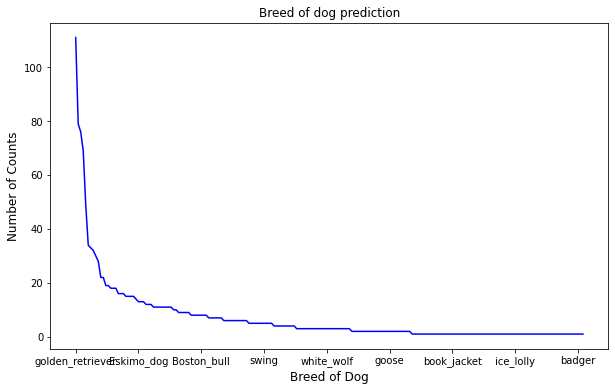

In [108]:
df['p1'].value_counts().plot(kind='line', color='blue', figsize=(10,6));
plt.xlabel('Breed of Dog', fontsize = 12)
plt.ylabel('Number of Counts',fontsize = 12)
plt.title('Breed of dog prediction');

In [111]:
# Popular predicted dog breed from the image.
df['p1'].value_counts()

golden_retriever      111
Pembroke               79
Labrador_retriever     76
Chihuahua              69
pug                    49
                     ... 
piggy_bank              1
giant_panda             1
badger                  1
street_sign             1
Japanese_spaniel        1
Name: p1, Length: 203, dtype: int64

#### _Insight Answer 1: The most predicted dog breed in the image tweet is **the Golden Retriever**_

### Insight Question 2: Which image number (numbered 1 to 4) corresponds to the most confident dog breed prediction?

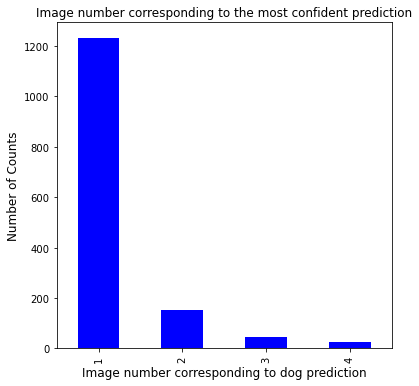

In [112]:
df["img_num"].value_counts().plot(kind='bar', color='blue',figsize=(6,6));
plt.xlabel('Image number corresponding to dog prediction', fontsize = 12)
plt.ylabel('Number of Counts',fontsize = 12)
plt.title('Image number corresponding to the most confident prediction');

In [113]:
df["img_num"].value_counts()

1    1233
2     153
3      44
4      24
Name: img_num, dtype: int64

#### _Insight Answer 2: The image number that corresponds to the most confident prediction is image number 1._

### Insight Question 3: What rating is given by most tweeters for the WeRateDogs tweet?

In [114]:
def tweet(var):
    df[var].value_counts().plot(kind='barh', color='green', fontsize = 12, figsize=(6,6), subplots=True);
    plt.xlabel('Number of Counts',fontsize = 12)
    plt.ylabel(var, fontsize = 12)
    plt.title(f'{var} of the tweet')
    plt.gca().invert_yaxis()

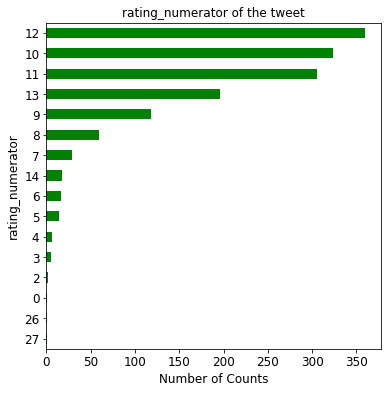

In [115]:
tweet("rating_numerator")

In [116]:
# Rating given by most tweeters
df.rating_numerator.value_counts()

12    360
10    323
11    306
13    196
9     118
8      59
7      29
14     17
6      16
5      14
4       6
3       5
2       2
0       1
26      1
27      1
Name: rating_numerator, dtype: int64

#### _Insight Answer 3: The rating given by most tweeters is 12/10._

### Insight Question 4: What is the most popular source from which tweeters tweeted WeRateDogs tweet from?

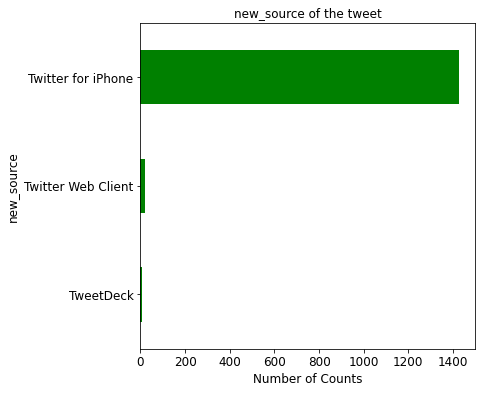

In [117]:
tweet("new_source")

In [118]:
df.new_source.value_counts()

Twitter for iPhone    1428
Twitter Web Client      19
TweetDeck                7
Name: new_source, dtype: int64

#### _Insight Answer 4: The most popular source from which tweeters tweeted WeRateDogs is Twitter for iPhone._

### Insight Question 5: What is the most popular dog stage according to the neural network’s image prediction ?

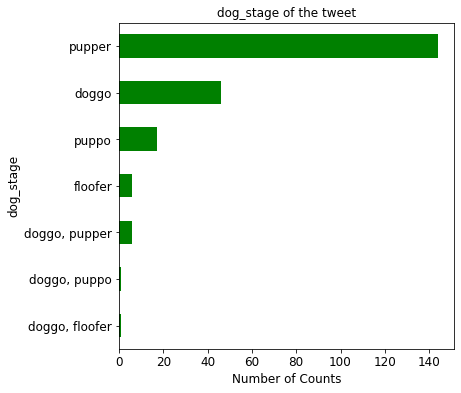

In [119]:
tweet("dog_stage")

In [120]:
df.dog_stage.value_counts()

pupper            144
doggo              46
puppo              17
floofer             6
doggo, pupper       6
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### _Insight Answer 5: According to the neural network’s image prediction, the most popular dog stage is the "pupper"._

### Insight Question 6: Which of the "WeRateDogs" tweet is the most retweeted by the tweeters?

In [121]:
# Most retweeted tweet
df.retweet_count.sort_values(ascending=False)

# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

583     79515
245     48265
51      45849
1102    31989
1057    30742
        ...  
1434       44
1450       41
1387       37
1427       23
1441       16
Name: retweet_count, Length: 1454, dtype: int64

In [122]:
df.loc[df['retweet_count']== 79515]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
583,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,79515,131075,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


### _Insight Answer 6: The most reweeted WeRateDogs tweet by the tweeters is "Here's a doggo realizing you can stand in a pool".  It was rated 13/10 and sent from Twitter for iPhone_.

### Insight Question 7: Which of the "WeRateDogs" tweet is the most favorite by the tweeters?

In [123]:
# Most favorite tweet
df.favorite_count.sort_values(ascending=False)

# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

245     132810
583     131075
51      107956
81       85011
55       71144
         ...  
1387         0
720          0
56           0
91           0
406          0
Name: favorite_count, Length: 1454, dtype: int64

In [124]:
# Most favorite tweet
df.loc[df['favorite_count']== 132810]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
245,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,puppo,48265,132810,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


#### _Insight Answer 7: The most favorite tweet of the WeRateDogs tweeted by the tweeters is "Here's a super supportive puppo participating in the Toronto #WomensMarch today". It was rated 13/10 and sent from Twitter for iPhone_.

### Insight Question 8a: Does the most favorite tweet connotes to the most tweet retweeted?

In [125]:
df.groupby('favorite_count')['retweet_count'].value_counts()

favorite_count  retweet_count
0               37               1
                83               1
                135              1
                136              1
                138              1
                                ..
71144           17300            1
85011           27680            1
107956          45849            1
131075          79515            1
132810          48265            1
Name: retweet_count, Length: 1454, dtype: int64

#### _Insight Answer 8a:_ The most favorite tweet is still retweeted by the tweeters although not the most retweeted.

### Insight Question 8b: Is the most retweeted tweet the the most favorite tweet by the tweeters?

In [126]:
df.groupby('retweet_count')['favorite_count'].value_counts()

retweet_count  favorite_count
16             81                1
23             107               1
37             0                 1
41             111               1
44             113               1
                                ..
30742          61794             1
31989          67100             1
45849          107956            1
48265          132810            1
79515          131075            1
Name: favorite_count, Length: 1454, dtype: int64

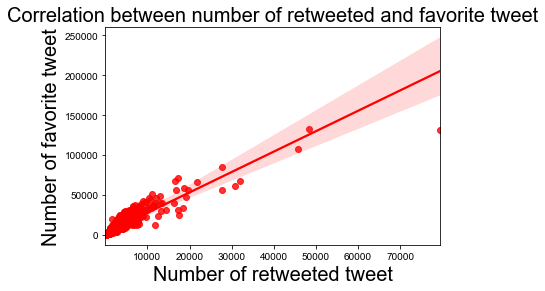

In [127]:
p= sns.regplot(x =df['retweet_count'], y =df['favorite_count'], color='red');
sns.set(rc = {'figure.figsize':(10,8)})
sns.set()
p.set_xlabel("Number of retweeted tweet", fontsize = 20);
p.set_ylabel("Number of favorite tweet", fontsize = 20);
p.set_title("Correlation between number of retweeted and favorite tweet", fontsize = 20);

# Source: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

#### _Insight Answer 8b:_ The most retweeted tweet is still one of the favorite tweet although not the most favorite. It can then be observed visually that there is a positive correlation between the number of retweeted tweet and the number of favorite tweet.

### Insight Question 9: What period of time does the tweeting and retweeting of the WeRateDogs tweet last for?

In [128]:
df["timestamp"].min(), df["timestamp"].max()

('2015-11-15 22:32:08', '2017-08-01 00:17:27')

#### _Insight Answer 9:_ The period oftime in which the tweeting and retweeting of the WeRateDogs tweet lasted is between the 15th of November 2015 to 1st of August 2017.